# Writeup

## Problem (unicode1): Understanding Unicode (1 point)


### (a) 
#### Question
What Unicode character does chr(0) return?

Deliverable: A one-sentence response.


In [1]:
chr(0)

'\x00'

#### Answer
`chr(0)` returns the Unicode character with code point 0, which is the null character (`'\x00'`).

### (b) 
#### Question
How does this character’s string representation (__repr__()) differ from its printed representa-
tion?

Deliverable: A one-sentence response.


In [2]:
repr(chr(0))

"'\\x00'"

In [3]:
print(chr(0))

 


The string representation `repr(chr(0))` is `"'\\x00'"`, showing the escape sequence, while printing `chr(0)` outputs nothing visible.

### (c) 
#### Question
What happens when this character occurs in text? It may be helpful to play around with the
following in your Python interpreter and see if it matches your expectations:
```
>>> chr(0)
>>> print(chr(0))
>>> "this is a test" + chr(0) + "string"
>>> print("this is a test" + chr(0) + "string")
```

Deliverable: A one-sentence response.

In [4]:
"this is a test" + chr(0) + "string"

'this is a test\x00string'

In [5]:
print("this is a test" + chr(0) + "string")

this is a test string


#### Response

When the null character occurs in text, it acts as an invisible character and does not display when printed.

# Problem (unicode2): Unicode Encodings (3 points)


## (a) 
### Question
What are some reasons to prefer training our tokenizer on UTF-8 encoded bytes, rather than
UTF-16 or UTF-32? It may be helpful to compare the output of these encodings for various
input strings.

Deliverable: A one-to-two sentence response.



Training a tokenizer on UTF-8 encoded bytes is preferred because it's a variable-length encoding that efficiently represents common characters with fewer bytes, resulting in a more compact vocabulary and faster processing. Unlike the fixed-width or wider variable-width formats of UTF-32 and UTF-16, UTF-8's design avoids unnecessary padding for frequent characters and handles the full Unicode range without introducing null bytes that can complicate text processing.

## (b) 
### Question
Consider the following (incorrect) function, which is intended to decode a UTF-8 byte string into
a Unicode string. Why is this function incorrect? Provide an example of an input byte string
that yields incorrect results.
```
def decode_utf8_bytes_to_str_wrong(bytestring: bytes):
    return "".join([bytes([b]).decode("utf-8") for b in bytestring])
>>> decode_utf8_bytes_to_str_wrong("hello".encode("utf-8"))
'hello'
```
Deliverable: An example input byte string for which decode_utf8_bytes_to_str_wrong pro-
duces incorrect output, with a one-sentence explanation of why the function is incorrect.



In [6]:
def decode_utf8_bytes_to_str_wrong(bytestring: bytes):
    return "".join([bytes([b]).decode("utf-8") for b in bytestring])

decode_utf8_bytes_to_str_wrong("é".encode("utf-8"))

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 0: unexpected end of data

An example of an input byte string that fails is 'é'.encode('utf-8'), which evaluates to b'\xc3\xa9'.

This function is incorrect because it attempts to decode each byte in isolation, whereas many Unicode characters, such as 'é', are represented by multi-byte sequences in UTF-8.

## (c) 
### Question
Give a two byte sequence that does not decode to any Unicode character(s).

Deliverable: An example, with a one-sentence explanation.

The byte sequence b'\xc2\xc2' does not decode to any Unicode character.

This sequence is invalid because the first byte (\xc2) indicates the start of a two-byte character, but the second byte is another start byte rather than the required continuation byte.

# Problem (train_bpe): BPE Tokenizer Training (15 points)

- Deliverable: Write a function that, given a path to an input text file, trains a (byte-level) BPE
tokenizer. Your BPE training function should handle (at least) the following input parameters:
- input_path: str Path to a text file with BPE tokenizer training data.
- vocab_size: int A positive integer that defines the maximum final vocabulary size (including the
initial byte vocabulary, vocabulary items produced from merging, and any special tokens).
- special_tokens: list[str] A list of strings to add to the vocabulary. These special tokens do not
otherwise affect BPE training.

Your BPE training function should return the resulting vocabulary and merges:

- vocab: dict[int, bytes] The tokenizer vocabulary, a mapping from int (token ID in the vocabu-
lary) to bytes (token bytes).
- merges: list[tuple[bytes, bytes]] A list of BPE merges produced from training. Each list item
is a tuple of bytes (<token1>, <token2>), representing that <token1> was merged with
<token2>. The merges should be ordered by order of creation.

To test your BPE training function against our provided tests, you will first need to implement the
test adapter at [adapters.run_train_bpe]. Then, run uv run pytest tests/test_train_bpe.py.
Your implementation should be able to pass all tests. Optionally (this could be a large time-investment),
you can implement the key parts of your training method using some systems language, for instance
C++ (consider cppyy for this) or Rust (using PyO3). If you do this, be aware of which operations
require copying vs reading directly from Python memory, and make sure to leave build instructions, or
make sure it builds using only pyproject.toml. Also note that the GPT-2 regex is not well-supported
in most regex engines and will be too slow in most that do. We have verified that Oniguruma is
reasonably fast and supports negative lookahead, but the regex package in Python is, if anything,
even faster.

## (a)

Train a byte-level BPE tokenizer on the TinyStories dataset, using a maximum vocabulary size
of 10,000. Make sure to add the TinyStories <|endoftext|> special token to the vocabulary.
Serialize the resulting vocabulary and merges to disk for further inspection. 

- How many hours and memory did training take? 
- What is the longest token in the vocabulary? Does it make sense?

Resource requirements: ≤ 30 minutes (no GPUs), ≤ 30GB RAM
Hint You should be able to get under 2 minutes for BPE training using multiprocessing during
pretokenization and the following two facts:
(a) The <|endoftext|> token delimits documents in the data files.
(b) The <|endoftext|> token is handled as a special case before the BPE merges are applied.
Deliverable: A one-to-two sentence response.

In [7]:
# import sys
# import os
# # Add the parent directory to Python path
# sys.path.insert(0, os.path.dirname(os.getcwd()))
# display(sys.path)

# from tests import adapters
# import time
# from memory_profiler import profile

# @profile
# def run_train_bpe(input_path: str, vocab_size: int, special_tokens: list):
#     vocab, merges = adapters.run_train_bpe(
#         input_path=input_path,
#         vocab_size=vocab_size,
#         special_tokens=["<|endoftext|>"],
#     )
#     return vocab, merges

# start_time = time.time()
# vocab, merges = run_train_bpe(
#     "../data/TinyStoriesV2-GPT4-valid.txt", 
#     vocab_size=10_000, 
#     special_tokens=["<|endoftext|>"])
# end_time = time.time()

# print(f"Training BPE took {end_time - start_time:.2f} seconds")

In [8]:
!mprof run profile_train_bpe.py

mprof: Sampling memory every 0.1s
running new process
running as a Python program...
sys.path = ['/home/tl/projects/learning/natural-language-processing/stanford-cs336/assignment1-basics', '', '/home/tl/projects/learning/natural-language-processing/stanford-cs336/assignment1-basics/writeup', '/usr/lib/python312.zip', '/usr/lib/python3.12', '/usr/lib/python3.12/lib-dynload', '/home/tl/projects/learning/natural-language-processing/stanford-cs336/assignment1-basics/.venv/lib/python3.12/site-packages']
Starting parallel pre-tokenization and counting...
Finished pre-tokenization. Found 13111 unique pre-tokens.
Starting 9743 BPE merge operations...
BPE Merges: 100%|███████████████████████████| 9743/9743 [16:08<00:00, 10.06it/s]
BPE training complete.
Filename: profile_train_bpe.py

Line #    Mem usage    Increment  Occurrences   Line Contents
    11    397.2 MiB    397.2 MiB           1   @profile
    12                                         def run_train_bpe(input_path: str, vocab_size: i

In [9]:
!mprof plot

Using last profile data.
Figure(1260x540)


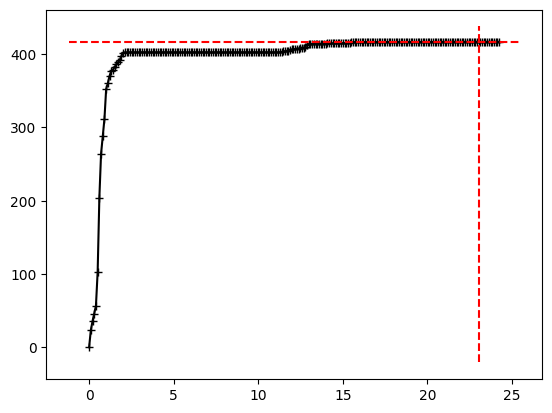

In [1]:
import matplotlib.pyplot as plt
import mprof

# Plot the memory profile
mprof.plot_file('mprofile_20250721130246.dat')  # or specify the exact .dat file
plt.show()

## (b)

Profile your code. What part of the tokenizer training process takes the most time?
Deliverable: A one-to-two sentence response.

## Note
- Profiling was done badly, should step into the function.
- But not a priority. 


# Problem (tokenizer): Implementing the tokenizer (15 points)

- **Deliverable**: Implement a Tokenizer class that, given a vocabulary and a list of merges, encodes
text into integer IDs and decodes integer IDs into text. Your tokenizer should also support user-provided
special tokens (appending them to the vocabulary if they aren’t already there). We recommend the
following interface:


- **def __init__(self, vocab, merges, special_tokens=None)** Construct a tokenizer from a given
vocabulary, list of merges, and (optionally) a list of special tokens. This function should accept
the following parameters:
    - vocab: dict[int, bytes]
    - merges: list[tuple[bytes, bytes]]
    - special_tokens: list[str] | None = None

- **def from_files(cls, vocab_filepath, merges_filepath, special_tokens=None)** Class
method that constructs and return a Tokenizer from a serialized vocabulary and list of merges
(in the same format that your BPE training code output) and (optionally) a list of special
tokens. This method should accept the following additional parameters:
    - vocab_filepath: str
    - merges_filepath: str
    - special_tokens: list[str] | None = None

- **def encode(self, text: str) -> list[int]** Encode an input text into a sequence of token IDs.
def encode_iterable(self, iterable: Iterable[str]) -> Iterator[int] Given an iterable of
strings (e.g., a Python file handle), return a generator that lazily yields token IDs. This is
required for memory-efficient tokenization of large files that we cannot directly load into
memory.

- **def decode(self, ids: list[int]) -> str** Decode a sequence of token IDs into text.

To test your Tokenizer against our provided tests, you will first need to implement the test adapter
at [adapters.get_tokenizer]. Then, run uv run pytest tests/test_tokenizer.py. Your imple-
mentation should be able to pass all tests.